In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import pandas as pd
from sklearn.preprocessing import normalize

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("glass.data", names=['ID','RI','NA2O','MGO','AL2O3','SIO2','K2O','CAO','BAO','FE2O3','TYPE'])

In [4]:
data.head()

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.drop(['ID'], axis=1, inplace=True)

In [6]:
data.shape

(214, 10)

In [7]:
data.dtypes

RI       float64
NA2O     float64
MGO      float64
AL2O3    float64
SIO2     float64
K2O      float64
CAO      float64
BAO      float64
FE2O3    float64
TYPE       int64
dtype: object

In [8]:
data.isna().sum()

RI       0
NA2O     0
MGO      0
AL2O3    0
SIO2     0
K2O      0
CAO      0
BAO      0
FE2O3    0
TYPE     0
dtype: int64

In [9]:
data['TYPE'].unique()

array([1, 2, 3, 5, 6, 7])

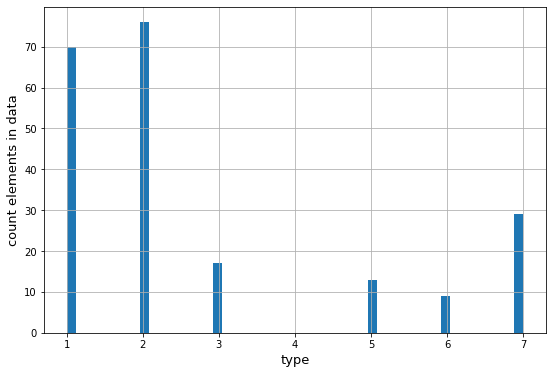

In [10]:
plt.figure(figsize=(9,6))
data['TYPE'].hist(bins=50)
plt.ylabel("count elements in data", fontsize=13)
plt.xlabel("type", fontsize=13)
plt.show()

classes not balanced!

In [11]:
data.describe()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
data.columns

Index(['RI', 'NA2O', 'MGO', 'AL2O3', 'SIO2', 'K2O', 'CAO', 'BAO', 'FE2O3',
       'TYPE'],
      dtype='object')

In [13]:
#balancing classes

data_balanced = pd.DataFrame(columns=data.columns)
print(data_balanced.head())
balanced_idx = 0
for typ in data['TYPE'].unique():
    cur_sample = data[data['TYPE'] == typ]
    cur_sample = shuffle(cur_sample)
    count_obj = cur_sample.shape[0]
    cur_sample.reset_index(drop=True, inplace=True)
    for i in range(1, 51):
        data_balanced.loc[balanced_idx] = cur_sample.loc[(i%count_obj)].values
        balanced_idx += 1
data_balanced = shuffle(data_balanced)

Empty DataFrame
Columns: [RI, NA2O, MGO, AL2O3, SIO2, K2O, CAO, BAO, FE2O3, TYPE]
Index: []


In [14]:
data_balanced.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
194,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.0,0.0,5.0
244,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6.0
54,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.0,0.0,2.0
142,1.51769,13.65,3.66,1.11,72.77,0.11,8.60,0.0,0.0,3.0
204,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.0,6.0


now they are balanced

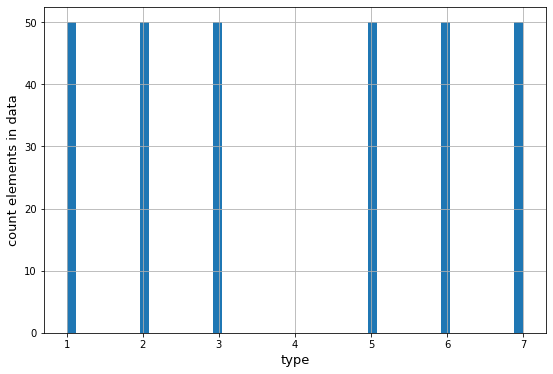

In [15]:
plt.figure(figsize=(9,6))
data_balanced['TYPE'].hist(bins=50)
plt.ylabel("count elements in data", fontsize=13)
plt.xlabel("type", fontsize=13)
plt.show()

lets look on distribution each feature

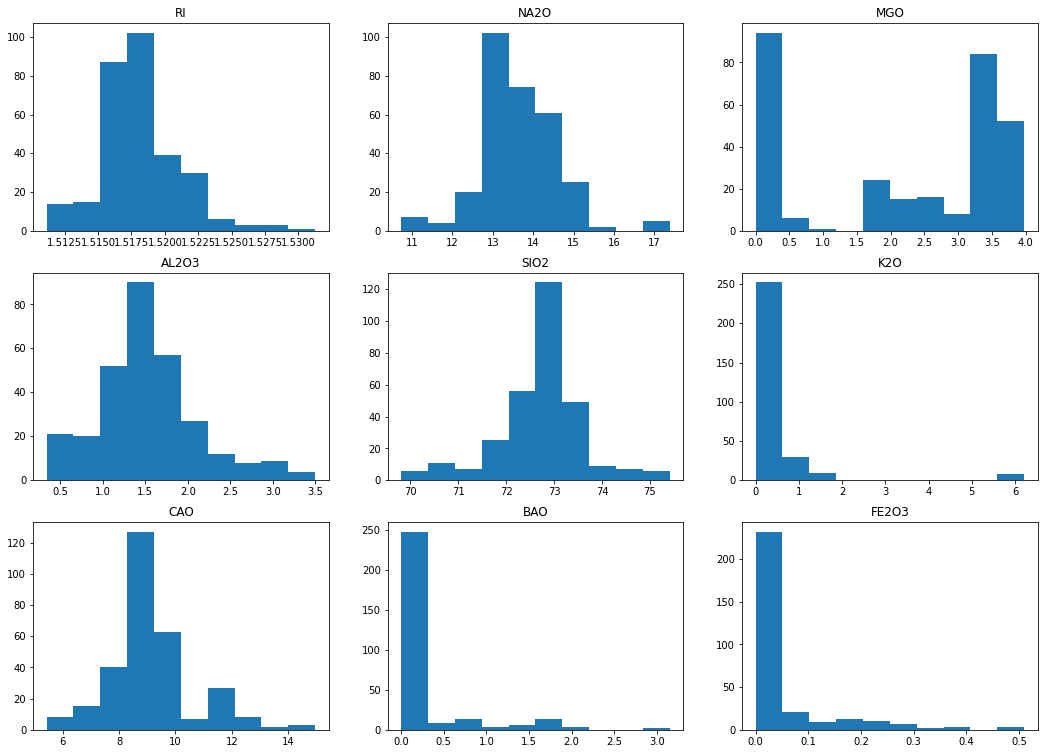

In [16]:
plt.figure(figsize=(18,13))
for idx, column in enumerate(data_balanced.drop(["TYPE"],axis=1).columns):
    plt.subplot(3,3,idx+1)
    plt.title(column)
    plt.hist(data_balanced[column])

you see, the 'MGO' has two spires.

maybe we can devide on two classes, according only MGO

In [17]:
data_balanced[data_balanced['MGO'] == 0][['MGO', 'TYPE']].groupby('TYPE').count()

,MGO
TYPE,
2.0,7
5.0,28
6.0,16
7.0,39


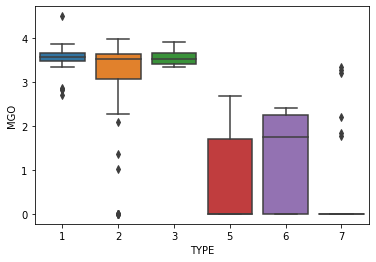

In [18]:
sns.boxplot(data=data, x='TYPE', y='MGO')
plt.show()

well, you see 5,6,7 types mostly do not have MGO, it can helps our desigion tree.

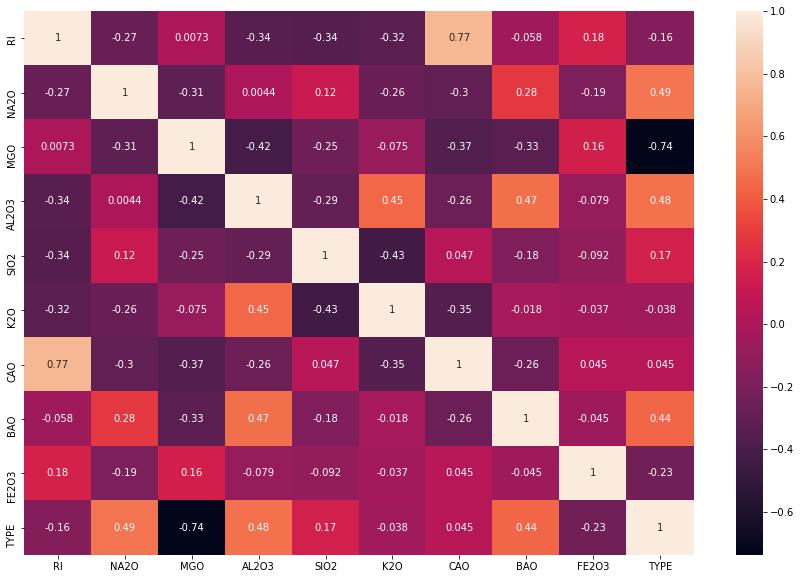

In [19]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.heatmap(data_balanced.corr(), annot=True)
plt.show()

as you can see, MGO realy has big correlation with target feature

now, lets compare two methods - decision tree and knn

In [20]:
est = DecisionTreeClassifier(max_depth=10)
est_n = KNeighborsClassifier()

In [21]:
data_two = data[data['TYPE'] <= 2]
data_two = shuffle(data_two)
print(cross_val_score(est, data_two.drop(['TYPE'], axis=1), data_two['TYPE'], cv=5, scoring= lambda cls, x, y: 1 - accuracy_score(cls.predict(x), y)).mean())
print(cross_val_score(est_n, data_two.drop(['TYPE'], axis=1), data_two['TYPE'], cv=5, scoring= lambda cls, x, y: 1 - accuracy_score(cls.predict(x), y)).mean())

0.2464367816091954
0.24620689655172412


you see error is realy big and equal, if we use not balanced classes

In [22]:
data_balanced = shuffle(data_balanced)
print(cross_val_score(est, data_balanced.drop(['TYPE'], axis=1), data_balanced['TYPE'], cv=5, scoring= lambda cls, x, y: 1 - accuracy_score(cls.predict(x), y)).mean())
print(cross_val_score(est_n, data_balanced.drop(['TYPE'], axis=1), data_balanced['TYPE'], cv=5, scoring= lambda cls, x, y: 1 - accuracy_score(cls.predict(x), y)).mean())

0.13
0.2533333333333333


yea! decision tree has twice smaller error then knn.

In [31]:
data_balanced_clean = shuffle(data_balanced.drop(['FE2O3', 'BAO', 'K2O'], axis=1))
print(cross_val_score(est, data_balanced_clean.drop(['TYPE'], axis=1), data_balanced_clean['TYPE'], cv=5, scoring= lambda cls, x, y: 1 - accuracy_score(cls.predict(x), y)).mean())
print(cross_val_score(est_n, data_balanced_clean.drop(['TYPE'], axis=1), data_balanced_clean['TYPE'], cv=5, scoring= lambda cls, x, y: 1 - accuracy_score(cls.predict(x), y)).mean())

0.13333333333333333
0.2333333333333333


we tried to drop some features, which have values primarily equal 0 in our distrebution subplots table. but it does not helps((

In [46]:
data_balanced_clean_norm = shuffle(data_balanced_clean)
data_balanced_clean_norm_X = data_balanced_clean_norm.drop(['TYPE'], axis=1)
data_balanced_clean_norm_y = data_balanced_clean_norm['TYPE']
data_balanced_clean_norm_X = normalize(data_balanced_clean_norm_X)
print(cross_val_score(est, data_balanced_clean_norm_X, data_balanced_clean_norm_y, cv=5, scoring= lambda cls, x, y: 1 - accuracy_score(cls.predict(x), y)).mean())
print(cross_val_score(est_n, data_balanced_clean_norm_X, data_balanced_clean_norm_y, cv=5, scoring= lambda cls, x, y: 1 - accuracy_score(cls.predict(x), y)).mean())

0.11666666666666667
0.2166666666666667


finaly we try to normalize features, but it helps only knn.

in conclusion, i can say, that in our task tree works better then knn.